## Lab | Handling Data Imbalance in Classification Models

 - Fit a logistic regression model on the training data
 
 1- Apply the resampling strategies used in class for upsampling and downsampling
 
 2- Apply SMOTE for upsampling the data     
 
 3- Apply TomekLinks for downsampling

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Customer-Churn.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [4]:
df=df[df['TotalCharges']!= " "]

In [5]:
pd.to_numeric(df['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [6]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
x=df[['tenure', 'SeniorCitizen', 'MonthlyCharges' , 'TotalCharges']]

In [8]:
x.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.5
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65


In [9]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(x)
X=transformer.transform(x)
X=pd.DataFrame(X)

In [10]:
y= df['Churn']


In [11]:
y.value_counts()


No     5163
Yes    1869
Name: Churn, dtype: int64

In [12]:
df1=pd.concat([X,y],axis=1)

In [13]:
dfd=df1.copy()
dfd.dropna(inplace=True)

## Downsampling

In [14]:

category_y = dfd[dfd['Churn'] == 'Yes']
category_n = dfd[dfd['Churn'] == 'No']

# We pick a random sample of rows from of observations belonging to "category_0"
# in the same amount of observations belonging to "category_1"
category_n = category_n.sample(len(category_y))
print(category_n.shape)
print(category_y.shape)

dfd = pd.concat([category_y, category_n], axis=0)
#shuffling the data
dfd = dfd.sample(frac=1)
dfd['Churn'].value_counts()

(1866, 5)
(1866, 5)


No     1866
Yes    1866
Name: Churn, dtype: int64

In [15]:
y= dfd['Churn']
X=dfd.drop(columns='Churn')

## Model

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)

predictions = classification.predict(X_test)


              precision    recall  f1-score   support

          No       0.49      0.81      0.61       365
         Yes       0.52      0.20      0.29       382

    accuracy                           0.50       747
   macro avg       0.51      0.50      0.45       747
weighted avg       0.51      0.50      0.45       747



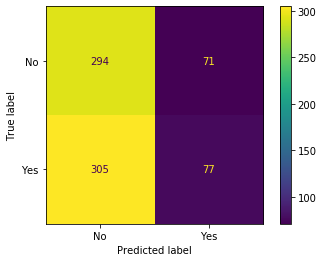

Cohen Kappa score 0.006950975470057075


In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

Downsampling = accuracy_score(y_test, predictions)
print(classification_report(y_test, predictions))

confusion_matrix(y_test, predictions)
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
from sklearn.metrics import cohen_kappa_score
print('Cohen Kappa score',cohen_kappa_score(y_test, predictions))

In [19]:
dfu=df1.copy()
dfu.dropna(inplace=True)

# Upsampling

In [20]:

category_y = dfu[dfu['Churn'] == 'Yes']
category_n = dfu[dfu['Churn'] == 'No']

# Upsampling 
# As we are going to repeat observations, the random samples can be picked more then once,
# threfore we need to use the keyword: replace=True
category_y = category_y.sample(len(category_n), replace=True)  
print(category_y.shape)

dfu = pd.concat([category_y, category_n], axis=0)
#shuffling the data
dfu = dfu.sample(frac=1)
dfu['Churn'].value_counts()

(5155, 5)


Yes    5155
No     5155
Name: Churn, dtype: int64

In [21]:
y= dfu['Churn']
X=dfu.drop(columns='Churn')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)

predictions = classification.predict(X_test)

              precision    recall  f1-score   support

          No       0.50      0.84      0.63      1008
         Yes       0.57      0.20      0.30      1054

    accuracy                           0.52      2062
   macro avg       0.54      0.52      0.47      2062
weighted avg       0.54      0.52      0.46      2062



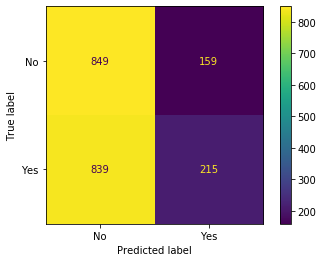

Cohen Kappa score 0.045575805697578575


In [24]:
Upsampling = accuracy_score(y_test, predictions)
print(classification_report(y_test, predictions))

confusion_matrix(y_test, predictions)
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
from sklearn.metrics import cohen_kappa_score
print('Cohen Kappa score',cohen_kappa_score(y_test, predictions))

In [25]:
dfs=df1.copy()
dfs.dropna(inplace=True)

y= dfs['Churn']
X=dfs.drop(columns='Churn')

## SMOTE

In [26]:
from imblearn.over_sampling import SMOTE

# SMOTE only can handle numerical features. Therefore, if we want to use categoricals they 
# will need to be dummyfied. However, for sake of simplicity we will not include the categoricals.

smote = SMOTE()
X_sm, y_sm = smote.fit_sample(X, y)

unique, counts = np.unique(y_sm, return_counts=True)
print(np.asarray((unique, counts)).T)

[['No' 5155]
 ['Yes' 5155]]


### Tain/Test

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

## Logistic Regression

In [28]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

              precision    recall  f1-score   support

          No       0.50      0.80      0.62      1017
         Yes       0.54      0.23      0.32      1045

    accuracy                           0.51      2062
   macro avg       0.52      0.51      0.47      2062
weighted avg       0.52      0.51      0.47      2062



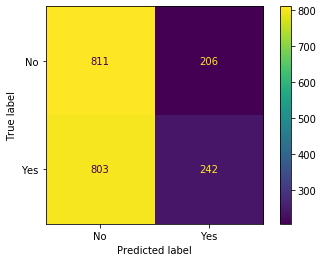

Cohen Kappa score 0.028795945937114653


In [29]:

lr_smote = accuracy_score(y_test, predictions)
print(classification_report(y_test, predictions))

confusion_matrix(y_test, predictions)
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
from sklearn.metrics import cohen_kappa_score
print('Cohen Kappa score',cohen_kappa_score(y_test, predictions))

## TomekLinks

In [30]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_sample(X, y)

unique, counts = np.unique(y_tl, return_counts=True)
print(np.asarray((unique, counts)).T)

[['No' 4409]
 ['Yes' 1866]]


### Tain/Test

In [31]:

X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=42)

## Logistic Regression

In [32]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)


The accuracy of the model on test set is: 0.70 
              precision    recall  f1-score   support

          No       0.70      1.00      0.82       876
         Yes       0.00      0.00      0.00       379

    accuracy                           0.70      1255
   macro avg       0.35      0.50      0.41      1255
weighted avg       0.49      0.70      0.57      1255



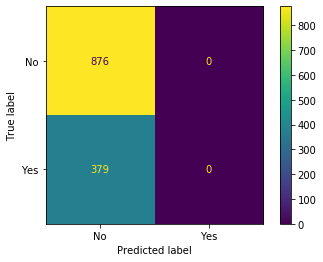

Cohen Kappa score 0.0


In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
lr_tom = accuracy_score(y_test, predictions)

confusion_matrix(y_test, predictions)
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
from sklearn.metrics import cohen_kappa_score
print('Cohen Kappa score',cohen_kappa_score(y_test, predictions))

In [34]:
accuracy = pd.DataFrame({'Acuracy':[round(lr_smote,2),round(lr_tom,2),round(Upsampling,2) ,round(Downsampling,2)]},
                        index=['Dawnsampling','Upsampling','SMOTE','TomekLinks'])

In [35]:
accuracy

,Acuracy
Dawnsampling,0.51
Upsampling,0.70
SMOTE,0.52
TomekLinks,0.50
